In [44]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('salary.csv')

#Check how many responders are in the dataframe and if the df has any null values

df.info()
df.isnull().sum().sum()
null_value_info = df[df['salary'].isnull()]
print(null_value_info)

#514 responders
#One null value
#Null value on index 208 in the salary column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB
     salary  exprior  yearsworked  yearsrank  market  degree  otherqual  \
208     NaN        0           21         10    0.93       1          0   

     position  male  Field  yearsabs  
208         3     1      4         1  


In [2]:
#Lowest and Highest Salary in the Group

salary = df['salary']

highest_salary =salary.max()
print(highest_salary)

lowest_salary = salary.min()
print(lowest_salary)

96156.0
29000.0


In [3]:
#Mean salary and mean standard error

salary_mean = salary.mean()

print(salary_mean)

std_mean_er = stats.sem(salary, nan_policy='omit')

print(std_mean_er)

50863.22009783626
560.0622753925232


In [4]:
#standard deviation for years worked

years_worked = df['yearsworked']

years_worked_std = years_worked.std()

print(years_worked_std)


9.444695144169813


In [5]:
#median salary for the sample

salary_med = salary.median()

print(salary_med)

50096.0


In [6]:
#salary interquartile range

salary_iqr = stats.iqr(salary, nan_policy='omit')

print(salary_iqr)

20345.0


1    386
0    128
Name: male, dtype: int64


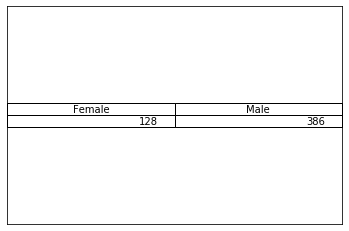

In [7]:
#Number of men and number of women in tyhe sample

print(df['male'].value_counts())

fig, ax = plt.subplots()

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

# Table from Ed Smith answer
clust_data = [df['male'].value_counts()]
collabel=("Female", "Male")
ax.table(cellText=clust_data,colLabels=collabel,loc='center')

In [8]:
#Executive men vs women

exec_series = df['position'] == 3

position_df = df[exec_series]

position_df['male'].value_counts()

#There are 192 males and 19 female executives

1    192
0     19
Name: male, dtype: int64

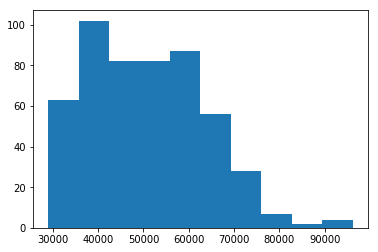

In [25]:
#salary histogram

plt.hist(salary)

plt.show()

In [16]:
salary.std()

12685.132357963685

In [ ]:
#Distribution obeservation

#The distribution is rightly skwed, showing more outliers on the right

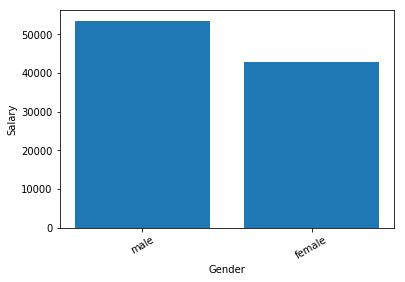

In [43]:
#Female and Male average salary bargraph

females = df['male'] == 0
males = df['male'] == 1

female_sal = df[females]
male_sal =df[males]

male_sal_avg = male_sal['salary'].mean()
female_sal_avg = female_sal['salary'].mean()

salaries = [male_sal_avg, female_sal_avg]

label = ['male', 'female']

x = np.arange(len(label))

plt.bar(x, salaries)
plt.xticks(x, label, fontsize=10, rotation=30)
plt.ylabel('Salary', fontsize=10)
plt.xlabel('Gender', fontsize=10)
plt.show()



/home/umuzi/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


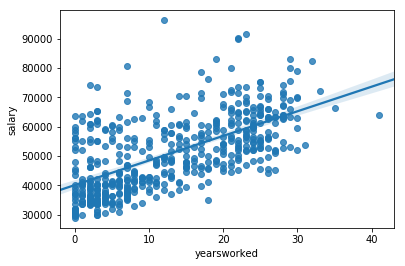

In [45]:
#Scatter plot between years worked and salary

sns.regplot(df['yearsworked'], df['salary'])